## 개요 ##


- 60개의 주파수를 사용해 208개의 목표물에 대해 바위(R)와 기뢰(M)로 구분한 데이터
- 따라서 60개의 속성(로우)이 있으며, 각 속성은 소나 신호의 주파수 성분을 나타낸다.
- 기뢰와 바위를 구분하는 모델에 사용할 특징은 Freq_1 ~ Freq_60이며, 타겟은 Label 컬럼이다.


## 인공 신경망 ##
- 인공신경망(ANN, Artificial Neural Network)은 뇌에서 뉴런이 정보를 처리하고 전달하는 방식에서 영감을 받아 설계된 알고리즘이다.


- 구성요소
 - 뉴런: 인공신경망의 기본단위로 여러 입력값을 받아 처리 후 출력값을 생성한다.
 - 가중치: 각 입력값의 중요도를 타나내는 값이다. 학습을 통해 조절된다.
 - 활성화 함수: 뉴런의 출력값을 결정하는 함수(예: 시그모이드, 렐루 등)


- 학습
 - 데이터를 인공신경망에 입력하면, 초기에는 무작위로 설정된 가중치를 바탕으로 예측값이 나온다.
 - 이 예측값과 실제값의 차이를 계산해, 오차를 줄이는 방향으로 가중치를 조절한다.
 - 이러한 과정을 여러 번 반복하면서 인공신경망은 데이터의 패턴을 학습한다.

In [76]:
import pandas as pd

df = pd.read_csv("sonar.all-data.csv")
df.head()


,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [77]:
# 데이터 크기
df.shape


(208, 61)

In [78]:
# 데이터 정보 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [79]:
df.describe()


,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [80]:
# 결측치 계산
df.isnull().sum()


Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64

In [81]:
# Label 개수 확인
df.groupby("Label").size()


Label
M    111
R     97
dtype: int64

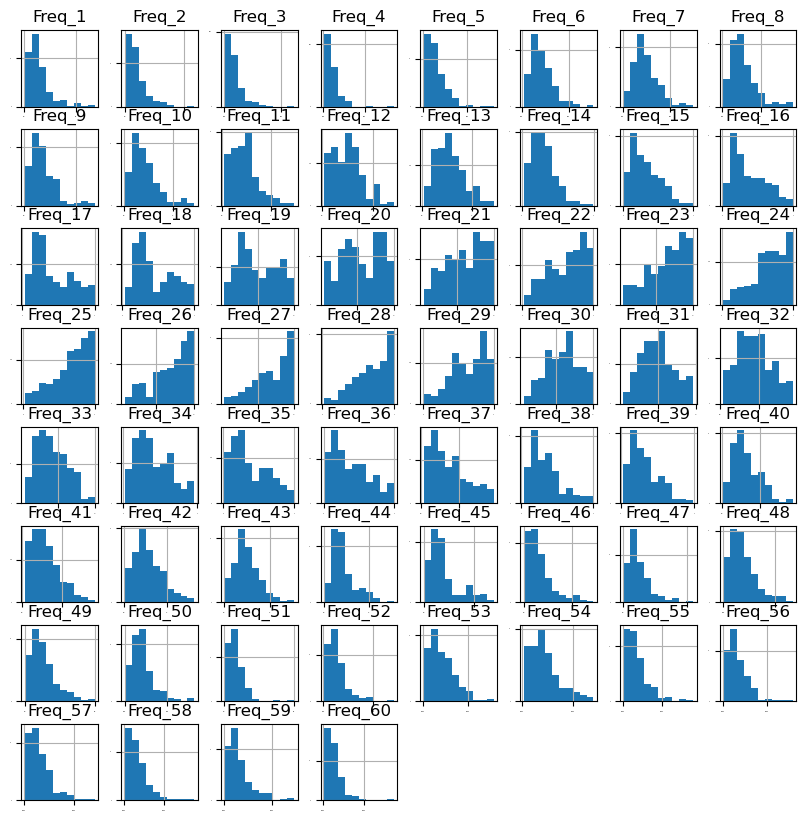

In [82]:
# 각 주파수별로 히스토그램 표시 
import matplotlib.pyplot as plt
df.hist(figsize=(10,10), sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

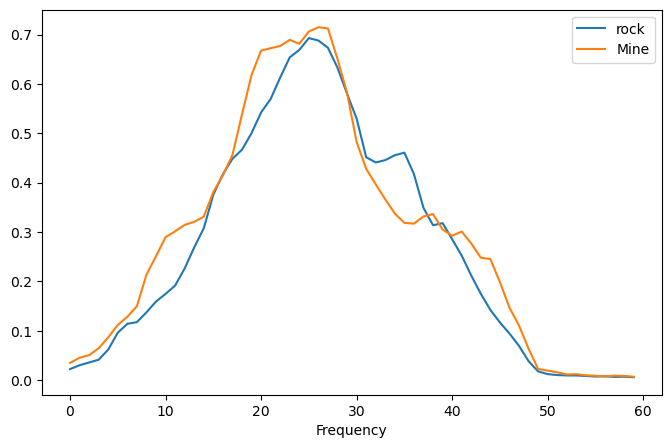

In [86]:
# 주파수에 대한 평균값들을 라인 그래프로 시각화 
#df[df['Label'] == 'R'].values[1:, :-1]  # 마지막 컬럼을 제외한 1번 로우를 선택

import numpy as np 
a = np.mean(df[df["Label"] == "R"].values[:, :-1], axis=0)
b = np.mean(df[df["Label"] == "M"].values[:, :-1], axis=0)

plt.figure(figsize=(8,5))
plt.plot(a, label='rock')
plt.plot(b, label='Mine')
plt.legend()

plt.xlabel('Frequency')
plt.show()

In [87]:
# 주파수별 상관관계 파악 corr 
df.corr(numeric_only=True)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
Freq_1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
Freq_2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
Freq_3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
Freq_4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
Freq_5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
Freq_6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
Freq_7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
Freq_8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
Freq_9,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
Freq_10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


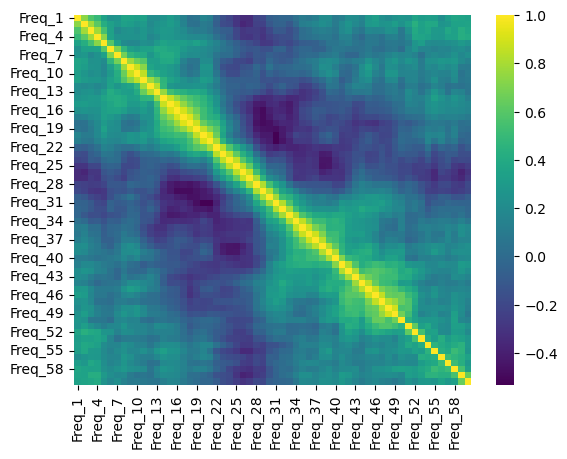

In [94]:
# 상관관계 히트맵
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True) ,cmap='viridis')
plt.show()

In [95]:
# 입력 데이터 및 타겟 데이터 선정 
data = df.iloc[:, :-1] # 전체 마지막 뺴고 iloc 입력 
target = df.iloc[:, -1] # 마지막 칼럼만" 지정   [rows,cols] :: =슬라이싱 범위 지정 

In [100]:
# 훈련 세트와 테스트 세트분할 
from sklearn.model_selection import train_test_split
train_input, test_input,train_target, test_target = train_test_split(
    data, target, test_size=0.3, random_state=42
)

print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(145, 60) (145,)
(63, 60) (63,)


In [109]:
# 기계 학습 모델 구현에서 사용될 값들을 수치형으로 변환한다. 
# 사이킷런의 LabelEncoder 클래스는 수치형 반환을 생성한다.
# 변환할 값은 타겟 값 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_target_encode = encoder.fit_transform(train_target)
test_target_encode = encoder.fit_transform(test_target)

print(train_target_encode)

cmapping = {index: label for index, label in enumerate(encoder.classes_)}
print('숫자 의미 매핑', cmapping)

#  라벨인코딩(a,b,c,d)->(1,2,3,4)한 인덱스값을 전부 넣음 

[0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0]
숫자 의미 매핑 {0: 'M', 1: 'R'}


In [105]:
# 캐라스를 이용한 신경망 모델 생성 

# 입력이 60차원이며, 100개의 노드로 구성이 된 신경망을 만든다. (노드 = 차원 즉 100 차원 벡터로 변환  )
# 활성화 함수로 렐루를 사용한다.
# 신경망의 마지막 층을 1개의 출력을 가지는 것으로 만들며, 시그모이드 활성화 함수를 사용한다.
# 비용함수로 binary_crossentropy를 사용한다.
# adam을 이용해 신경망을 최적화 한다.
# 'accuracy'를 사용해 훈련 중 정확도를 보여준다.


#  계산 145,60 -> 145, 100 -> 145,1  

# 여기서 145,1 로 얻는 이득 =  이진분류 하기 쉬워짐 


from keras import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential([
        Dense(100, input_shape=(60,), activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
#  input_shape 60, =  60개의 (특징(차원))을 가지는 1차 백터 차원 , (단일값)쉼표 튜플 문법 사용 
model = build_model()
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 100)                 │           6,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,201 (24.22 KB)

 Trainable params: 6,201 (24.22 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
# 에포크 200회 진행 훈련 
history = model.fit(train_input,train_target_encode,epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4832 - loss: 0.6998
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6375 - loss: 0.6665 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5657 - loss: 0.6524
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6857 - loss: 0.6477
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7494 - loss: 0.6349 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7461 - loss: 0.6250 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7575 - loss: 0.6062 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7674 - loss: 0.6015  
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7266 - loss: 0.6023
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7568 - loss: 0.5881 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7629 - loss: 0.5945
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8026 - l

In [111]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


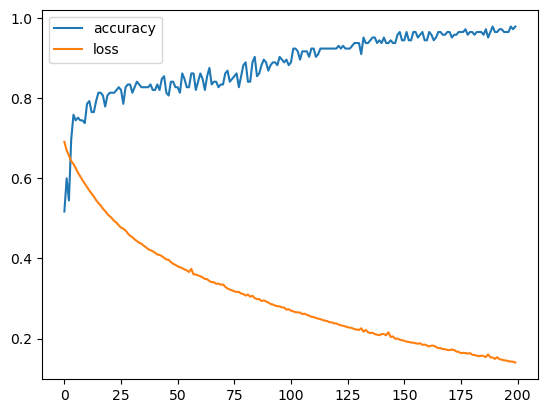

In [112]:
pd.DataFrame(history.history).plot()
plt.show()

In [116]:
# 구축된 모델 평가 : evaluate 
print(train_input.shape)
print(train_target_encode.shape)

(145, 60)
(145,)


In [117]:
loss, accuracy = model.evaluate(train_input, train_target_encode)
print('훈련손실율', {loss})
print('훈련정확도', {accuracy})

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9658 - loss: 0.1499  
훈련손실율 {0.1393107771873474}
훈련정확도 {0.9793103337287903}


In [118]:
loss, accuracy = model.evaluate(test_input, test_target_encode)
print("훈련손실율", {loss})
print("훈련정확도", {accuracy})


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8633 - loss: 0.2846
훈련손실율 {0.2972221374511719}
훈련정확도 {0.8730158805847168}


In [119]:
def build_model():
    model = Sequential(
        [
            Dense(256, input_shape=(60,), activation="relu"),
            Dense(128, activation="relu"),
            Dense(64, activation="relu"),
            Dense(32, activation="relu"),
            Dense(16, activation="relu"),
            Dense(1, activation="sigmoid"),
        ]
    )

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


#  input_shape 60, =  60개의 특징을 가지는 1차 백터 차원 , (단일값)쉼표 튜플 문법 사용
# 캐라스에서는 이전층의 출력 개수를 입력크기로 자동계산 

model = build_model()
model.summary()


C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 256)                 │          15,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,393 (232.00 KB)

 Trainable params: 59,393 (232.00 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
# 에포크 200회 진행 훈련 재훈련 
history = model.fit(train_input, train_target_encode, epochs=200, verbose=0)


In [121]:
loss, accuracy = model.evaluate(train_input, train_target_encode)
print("훈련손실율", {loss})
print("훈련정확도", {accuracy})


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 7.5594e-05 
훈련손실율 {6.848565681139007e-05}
훈련정확도 {1.0}


In [122]:
loss, accuracy = model.evaluate(test_input, test_target_encode)
print("훈련손실율", {loss})
print("훈련정확도", {accuracy})


# 정확도는 높아젔으나 과적합 됐다. 그냥 진행 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9158 - loss: 0.5621 
훈련손실율 {0.5701982378959656}
훈련정확도 {0.920634925365448}


In [123]:
# 테스트 데이터로 모델을 예측 
test_pred = model.predict(test_input)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [125]:
print(test_pred[:10])

[[1.7416287e-08]
 [9.9998403e-01]
 [4.9326760e-01]
 [9.9997264e-01]
 [3.6189379e-06]
 [9.8225307e-01]
 [5.2862015e-04]
 [3.7340051e-04]
 [9.9999946e-01]
 [4.3195410e-05]]


In [126]:
# 예측 결과를 0~ 1 사이의 값으로 변경 
# 텐서 플로의 greater() 메서드 사용 
import tensorflow as tf
test_pred_encode = tf.greater(test_pred,0.5)
print(test_pred_encode[:10])

tf.Tensor(
[[False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]], shape=(10, 1), dtype=bool)


In [127]:
# 사이킷 런의 classification_report()를 이용해서 평가지표를 출력 
# 지표에 사용되는 데이터는 타겟 테스트 데이터, 예측 결과 데이터 

from sklearn.metrics import classification_report
print(classification_report(test_target_encode, test_pred_encode))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.93      0.89      0.91        28

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



In [128]:
# 혼돈 행렬 작성 
# 0과 1 , R 과 M 분류 상황 표시 

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_target_encode, test_pred_encode)
print(cm)

[[33  2]
 [ 3 25]]


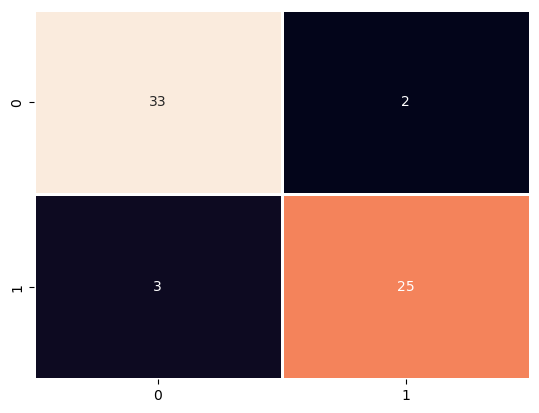

In [130]:
sns.heatmap(cm, linewidths=1, cbar=False , annot=True , fmt='d')
plt.show()

In [133]:
print(test_input.iloc[:1])
print(test_target.iloc[:1])

     Freq_1  Freq_2  Freq_3  Freq_4  Freq_5  Freq_6  Freq_7  Freq_8  Freq_9  \
161  0.0305  0.0363  0.0214  0.0227  0.0456  0.0665  0.0939  0.0972  0.2535   

     Freq_10  ...  Freq_51  Freq_52  Freq_53  Freq_54  Freq_55  Freq_56  \
161   0.3127  ...   0.0271     0.02    0.007    0.007   0.0086   0.0089   

     Freq_57  Freq_58  Freq_59  Freq_60  
161   0.0074   0.0042   0.0055   0.0021  

[1 rows x 60 columns]
161    M
Name: Label, dtype: object


In [138]:
new_test_pred = model.predict(test_input.iloc[:1])
print(new_test_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
[[1.7416287e-08]]


In [139]:
import pandas as pd
import numpy as np

# 열 이름 설정
column_names = [f"Freq_{i}" for i in range(1, 61)]

# 2개의 행과 60개의 열을 가진 임의의 데이터 생성
random_data = np.random.random(size=(2, 60))  # 0과 1 사이의 랜덤 값 생성

# 데이터프레임 생성
test_df = pd.DataFrame(random_data, columns=column_names)

# 출력
print(test_df)


     Freq_1    Freq_2    Freq_3    Freq_4    Freq_5    Freq_6    Freq_7  \
0  0.246061  0.131145  0.163334  0.590287  0.342711  0.009963  0.562742   
1  0.142454  0.673585  0.246317  0.596292  0.841718  0.909309  0.536338   

     Freq_8    Freq_9   Freq_10  ...   Freq_51   Freq_52   Freq_53   Freq_54  \
0  0.289692  0.350313  0.291005  ...  0.165503  0.858643  0.482382  0.533551   
1  0.940565  0.929103  0.246841  ...  0.873452  0.702321  0.070785  0.774209   

    Freq_55   Freq_56   Freq_57   Freq_58   Freq_59   Freq_60  
0  0.369117  0.793963  0.061231  0.356294  0.430458  0.989599  
1  0.569991  0.697803  0.096164  0.766048  0.312439  0.844523  

[2 rows x 60 columns]


In [140]:
new_test_pred = model.predict(test_df)
print(new_test_pred)

new_test_pred_encode = tf.greater(new_test_pred, 0.5)
print(new_test_pred_encode)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
[[6.6019899e-15]
 [1.7632543e-16]]
tf.Tensor(
[[False]
 [False]], shape=(2, 1), dtype=bool)


In [142]:
print(data.shape)
print(target.shape)

(208, 60)
(208,)


In [ ]:
# 최종 정리  : 
# train_input = 훈련해야할 입력값  /내가 해석할 값 : (샘플수, 특징)
# train_target = 훈련해서 출력할 결과값 /내가 해석 하고 싶은 값의 수(정답 데이터)  (샘플수,)
# train_target_encode = 정답 데이터의 이진법 인코딩값(데이터 표기를 쉽게 하기 위해)
# model 훈련 => 입력 ,정답데이터로 훈련  (중간에 데이터 손실이 있음)

# 위 값을 여리곳에 넣고 엄청 돌리는것 



# Dense 수는 학습량에 맞는 최적의 숫자가 요구됨 

# model(매개변수) = (입력차원 * 노드수)+ 노드수
# 텍스트는 그냥 dense 에 넣어도 됨  2차원 까지 들어감 

#  Dense 수만큼 모델의 매개변수가 나옴 
# ex: Dense 100 ->1 모델 =
# Dense(100, input_shape=(60,), activation="relu")
# 첫 번째 레이어 매개변수: 6100
# 두 번째 레이어 매개변수: 101
#  총 매개변수 = 6201








# 설명 
# 가중치(weight):
# 입력 데이터와 노드 간의 연결 강도를 나타냅니다.
# 편향(bias):
# 각 노드에서 추가로 조정하는 값입니다.